# Лабораторная работа 5. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [12]:
ary = [0,3,5,1,2,3,5,4,2,34,43,24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [1]:
def selection_sort(array):
    for i in range(len(array) - 1): # Указывает на начало неотсортированной части
        m = i
        j = i + 1
        while j < len(array):
            if array[j] < array[m]:
                m = j
            j = j + 1
        array[i], array[m] = array[m], array[i]
    return array

Тестовый запуск:

In [14]:
alist = ary.copy()
print (selection_sort(alist))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё место (в начале массива). 

Сложность: $O(n^2)$.

In [15]:
def insertion_sort(a):
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (j > 0) and (a[j-1] > v):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a

In [16]:
alist = ary.copy()
print (insertion_sort(alist))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [7]:
def bubble_sort(a):
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [8]:
alist = ary.copy()
print (bubble_sort(alist))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n^2)$.

In [9]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [10]:
alist = ary.copy() 
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: Средняя $O(n log_2 n)$, Худшая $O(n^2)$.

In [4]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r

        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
            
        a[i], a[r] = a[r], a[i]

        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [6]:
alist = ary.copy() 
quick_sort(alist, 0, len(alist)-1)
print (alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом элементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего элемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

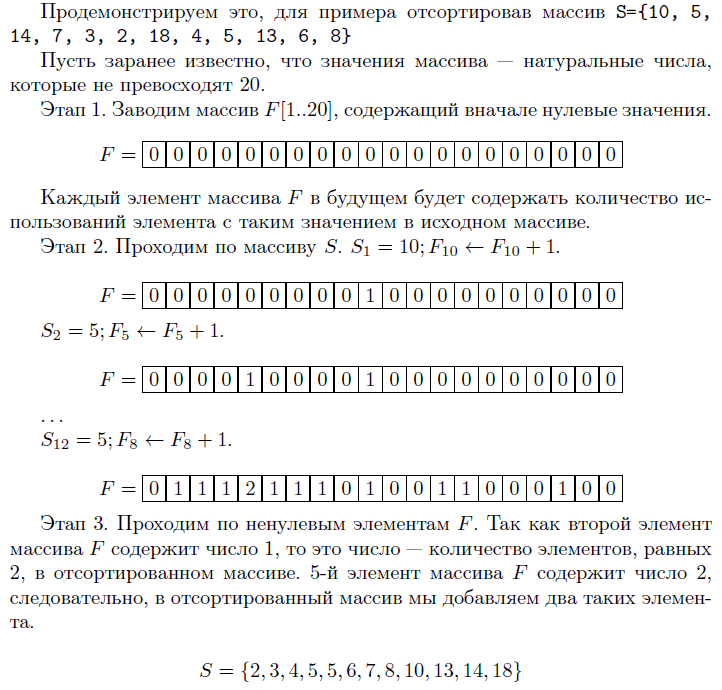

In [7]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

# Пример. Число $\pi$

In [5]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

In [6]:
# Выведем заданное колличество знаков числа pi
npi=7;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 7 знаков числа пи:
 3.141593


Конвертируем дробную часть числа $\pi$ в список:

In [7]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором хранятся 10 000 000 его символов):

In [8]:
f = open("pi-10million.txt")  #  открываем файл. Оригинал файла находится по адресу https://introcs.cs.princeton.edu/java/data/pi-10million.txt
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [9]:
fs

'1415926'

In [10]:
Pi = [int(i) for i in fs]
print(Pi)

[1, 4, 1, 5, 9, 2, 6]


# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки time. Пример:

In [17]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Time = time.time() - start_time
print ('Отсортированные цифры числа пи: \n\n', PI2)
print('\n Время потраченное на сортировку составило %15.7e секунд' % Time)

Отсортированные цифры числа пи: 

 [1, 1, 3, 4, 5, 9]

 Время потраченное на сортировку составило   0.0000000e+00 секунд


Запишем отсортированный список в файл:

In [18]:
f1 = open("pi_sort.txt", 'w')
f1.writelines('%i' % i for i in PI2)
f1.close()

Проверим что получилось:

In [19]:
f1 = open("pi_sort.txt", 'r')
fs = f1.readlines()          #  считываем всё содержимое файла
print(fs)
f1.close()

['113459']


Посмотрим как меняются затраты времени на сортировку вставками при увеличении числа сортируемых объектов:

In [20]:
ik = 11
Time = np.zeros(ik)
NPI = [(i+1)*50 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Time[i]=time.time()-start_time
    i+=1

	 size	 Tame(sec)
	 50 	 9.997e-04
	 100 	 9.985e-04
	 150 	 3.997e-03
	 200 	 6.996e-03
	 250 	 1.199e-02
	 300 	 1.200e-02
	 350 	 1.999e-02
	 400 	 2.099e-02
	 450 	 2.598e-02
	 500 	 5.397e-02
	 550 	 3.498e-02


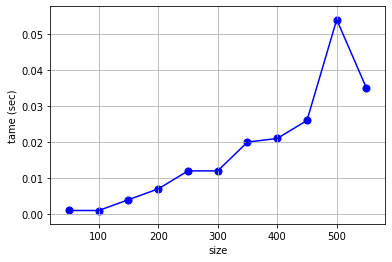

In [22]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Time[i]))

# график функции
pylab.figure ()
plt.plot(NPI, Time, c='b')
plt.scatter(NPI, Time, c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [40]:
def dummy_search (a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [41]:
ary = [7,8,1,2,3,4,13,5,1,2,44,5,1]
print(dummy_search (ary, 13))

6


In [45]:
# вероятно чуть более рациональная реализация
def clever_search (a, key):
    n = len(a)
    i=0
    while a[i]!=key:
        i=i+1
    return i

In [46]:
ary2 = [7,8,1,2,3,4,13,5,1,2,44,5,1,44]
print(clever_search (ary2, 13))

6


In [47]:
%timeit dummy_search (ary, 44)
    
%timeit clever_search (ary2, 44)

1.22 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.12 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры начиная с 1 встретившейся количество раз равное её значению (первую единицу, вторую двойку и т.д.)

# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части после которой идёт последовательность из:

- шести 9;
- шесть 8;
- шесть 0;
- первых шести цифр;
- семь цифр вашего номера телефона.

# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- бинарный поиск (https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- интерполирующий поиск (https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)

(см. лекцию 3 с. 17)

# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию) реализующую алгоритм пирамидальной сортировки (https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0,
https://habr.com/ru/post/221095/,
Алгоритмы. Справочник с примерами на C, C , Java и Python (Хайнеман Дж., и др - 2017) с. 87).

# Задание "Малые тела"

Есть база данных малых тел солнечной системы созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать здесь https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT, а здесь приведено его описание https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html

Отсортируйте эту базу по названию малого тела. Напишите две программы реализующие поиск в отсортированном и неотсартированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.